In [1]:
# Importing the necessary packages!
from jupyterthemes import jtplot
import warnings
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import pandas_profiling
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
# ignore warnings
warnings.filterwarnings('ignore')

jtplot.style(theme='oceans16', context='notebook',
             ticks=True, grid=False, figsize=(10, 9))

In [2]:
df=pd.read_csv('./rawdata/nf_full.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 19 columns):
First_Name                                                                                149 non-null object
Last_Name                                                                                 149 non-null object
Year                                                                                      149 non-null object
Title                                                                                     116 non-null object
Organization                                                                              117 non-null object
Field                                                                                     115 non-null object
Email                                                                                     116 non-null object
URL                                                                                       115 non-null object
title          

In [4]:
df.loc[df['title'].isna()]
#df.loc[df['abstract'].isna()]

,First_Name,Last_Name,Year,Title,Organization,Field,Email,URL,title,mention_realism,mention_china,mention_russia,mention_nuclear,uses_quantiative_methods,main theme: cold war = 0 civil war = 1 civil-mil relations = 2 terrorism = 3 other = 4,abstract,Unnamed: 16,mention_experiment,mention_case_study
27,Brett,Benson,2003,Associate Professor,Vanderbilt University,Other,brett.benson@vanderbilt.edu,https://www.vanderbilt.edu/political-science/b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deterrence theory focuses on discovering how s...,Conflict Between States,NaN,NaN
34,Michael,Horowitz,2004,Professor,University of Pennsylvania,Military Issues,horom@sas.upenn.edu,https://www.sas.upenn.edu/polisci/people/stand...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,Todd,Sechser,2006,Associate Professor,University of Virginia,International Relations,tsechser@virginia.edu,http://politics.virginia.edu/todd-sechser/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sechser’s research project is about the use an...,IR Scholarship,NaN,NaN
47,Daniel,Jonathan,2006,Associate Professor,UC Berkeley,International Relations,daniel.sargent@berkeley.edu,http://history.berkeley.edu/people/daniel-sargent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Historians of the Cold War have tended to disr...,Cold War,NaN,NaN
48,Paul,MacDonald,2006,Associate Professor,Wellesley College,Foreign Policy,pkmacdonald@wellesley.edu,https://www.wellesley.edu/politicalscience/fac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,One of the most common ways powerful states in...,IR Scholarship,NaN,NaN
49,Jacob,Kathman,2006,Associate Professor,University of Buffalo,Other,kathman@buffalo.edu,http://polsci.buffalo.edu/facultystaff/kathman/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In this research, Kathman addresses the region...",Civil War,NaN,NaN
50,Wayne,Hsieh,2006,Associate Professor,Foreign Policy,Military Issues,hsieh@usna.edu,https://www.usna.edu/History/Faculty/Hsieh.php,NaN,NaN,NaN,NaN,NaN,NaN,NaN,How a society wishes to fight a war frequently...,Civil War,NaN,NaN
51,Michael,Findley,2006,Professor,University of Texas at Austin,Terrorism,mikefindley@utexas.edu,https://liberalarts.utexas.edu/government/facu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,One of the greatest threats to the peaceful re...,Civil War,NaN,NaN
118,Carrie,Lee,2016,Assistant Professor,Foreign Policy,Civil War,carrieannlee1@gmail.com,https://carrieannlee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Do domestic political institutions affect the ...,IR Scholarship,NaN,NaN
137,Michael,Fasulo,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,My dissertation argues that U.S. policymakers’...,Nuclear Weapons,NaN,NaN


# Select Collums of Interest

In [5]:
#df = df[['Year', 'First_Name', 'Last_Name','title', 'abstract', 'Unnamed: 16']].dropna()
df = df[['Year','title', 'abstract', 'Unnamed: 16']].dropna()

In [6]:
df.isnull().sum()

Year           0
title          0
abstract       0
Unnamed: 16    0
dtype: int64

# Rename Columns

In [7]:
df.rename(columns={'Unnamed: 16': 'theme'}, inplace=True)
df.rename(columns={'Year': 'year'}, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 151
Data columns (total 4 columns):
year        127 non-null object
title       127 non-null object
abstract    127 non-null object
theme       127 non-null object
dtypes: object(4)
memory usage: 5.0+ KB


In [9]:
df.head()

,year,title,abstract,theme
0,2000,"""Institutions at the Domestic/International Ne...",Civil-military relations are frequently studie...,IR scholarship
1,2000,Born to Lose and Doomed to Survive: State Deat...,"Under what conditions do states die, or exit t...",IR scholarship
2,2000,The significance of “allegiance” in internatio...,My dissertation employs original and secondary...,IR scholarship
3,2000,The significance of “allegiance” in internatio...,\nThis study revises prevailing interpretation...,Conflit Between States
4,2000,Truth-Telling and Mythmaking in Post-Soviet Ru...,Can distorted and pernicious ideas about histo...,Conflict Between States


In [10]:
df.tail()

,year,title,abstract,theme
145,2008,Sherman was Right”: The Experience of AEF Sold...,When the United States declared war in the spr...,Military History
146,2008,"Miser, Grafter, Slacker, Coward: Doughboys, th...","During the First World War, approximately two ...",Other
147,2008,Yesterday’s Answers or Tomorrow’s Solutions? T...,This dissertation examines Cyrus Vance’s appro...,IR Scholarship
150,2013,“Progressives in Navy Blue: U.S. Naval Profess...,My dissertation traces how intellectual and in...,Military History
151,2013,"Undermining Resistance: Mobilization, Repressi...",This study examines attempts by authorities to...,Nonstate


In [11]:
df.year.value_counts()

2008      10
2004       9
2014       9
2002       8
2015       8
2013       8
2010       8
2000       8
2012       8
2009       7
2001       7
2011       7
2007       6
2018       6
2017       6
2016       5
2005       4
2003       2
NF2000     1
Name: year, dtype: int64

In [12]:
df = df[df.year != 'NF2000']

# Build Mention Columns with Regex

In [13]:
import re

df['China'] = np.where(df.abstract.str.contains('China'), 1, 0)
df['Russia'] = np.where(df.abstract.str.contains('Soviet'), 1, 0)
df['War'] = np.where(df.abstract.str.contains('war'), 1, 0)
df['President'] = np.where(df.abstract.str.contains('President'), 1, 0)
df['Vietnam'] = np.where(df.abstract.str.contains('Vietnam'), 1, 0)
df['US'] = np.where(df.abstract.str.contains('United States'), 1, 0)
df['Cold War'] = np.where(df.abstract.str.contains('Cold War'), 1, 0)
df['World War'] = np.where(df.abstract.str.contains('World War'), 1, 0)
df['Vietnam War'] = np.where(df.abstract.str.contains('Vietnam War'), 1, 0)
df['Korean War'] = np.where(df.abstract.str.contains('Korean War'), 1, 0)
df['Survey'] = np.where(df.abstract.str.contains('survey'), 1, 0)
df['Case Study'] = np.where(df.abstract.str.contains('case'), 1, 0)
df['Trade'] = np.where(df.abstract.str.contains('trade'), 1, 0)
df['Humanitarian'] = np.where(df.abstract.str.contains('humanitarian'), 1, 0)




## Select Columns of Interest

In [14]:
df=df[["year", 'title', "abstract", 'theme', "China", "Russia", "War", 'President', 'US', 'Vietnam',
       'Cold War', 'World War', 'Vietnam War', 'Korean War', 'Survey', 'Case Study', 'Trade', 'Humanitarian']]

In [15]:
# sort by year
df=df.sort_values(by='year')

In [16]:
df.to_csv('./processed_data/nf_complete.csv')

# Pre-processing

In [17]:
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

# Fixing theme value counts

In [18]:
df['theme'].value_counts()

def fix_theme(row):
   string = row["theme"]
   if string == "Conflict Between states":
       string = "Conflict Between States"
   elif string == "ConflictBetween states":
       string = "Conflict Between States"
   elif string == "Conflict between states":
       string = "Conflict Between States"       
   elif string == "Conflit Between States":
       string = "Conflict Between States"
   return string

df['theme'] = df.apply(fix_theme, axis = 1)

df['theme'].value_counts()

IR Scholarship                                      41
Military History                                    23
Conflict Between States                             15
Nuclear Weapons                                      6
Non-state                                            5
Nonstate                                             5
Other                                                4
IR scholarship                                       3
Cold War                                             3
Non-State                                            2
Culture                                              2
Canadian History / War History                       1
Terrorism                                            1
ICS                                                  1
Domestic Policy                                      1
Peace Process                                        1
Civil War                                            1
Ethics of War                                        1
Unconventi

In [19]:
df['theme'].value_counts()

def fix_theme(row):
   string = row["theme"]
   if string == "IR scholarship":
       string = "IR Scholarship"
   elif string == "Non-State":
       string = "Non-State Actors"
   elif string == "Nonstate":
       string = "Non-State Actors"       
   elif string == "Nonstate":
       string = "Non-State Actors"
   elif string == "Non-state":
       string = "Non-State Actors"     
   return string

df['theme'] = df.apply(fix_theme, axis = 1)

df['theme'].value_counts()

IR Scholarship                                      44
Military History                                    23
Conflict Between States                             15
Non-State Actors                                    12
Nuclear Weapons                                      6
Other                                                4
Cold War                                             3
Culture                                              2
Military Technology                                  1
Unconventional Warfare / Conflcit Between States     1
Terrorism                                            1
Peace Process                                        1
Vietnam War / Conflict Between States                1
Ethics of War                                        1
Soviet Union                                         1
Canadian History / War History                       1
Civil-military                                       1
Civil War                                            1
Domestic P

In [20]:
df['theme'].value_counts()

def fix_theme(row):
   string = row["theme"]
   if string == "Miltary History":
       string = "Military History"
   elif string == "Civ-Mil":
       string = "Civil-military"
   elif string == "IR Scholarship / Nuclear Weapons":
       string = "Nuclear Weapons"       

   return string

df['theme'] = df.apply(fix_theme, axis = 1)

df['theme'].value_counts()

IR Scholarship                                      44
Military History                                    24
Conflict Between States                             15
Non-State Actors                                    12
Nuclear Weapons                                      7
Other                                                4
Cold War                                             3
Civil-military                                       2
Culture                                              2
Vietnam War / Conflict Between States                1
Military Technology                                  1
Unconventional Warfare / Conflcit Between States     1
Terrorism                                            1
Peace Process                                        1
Soviet Union                                         1
Ethics of War                                        1
Canadian History / War History                       1
Civil War                                            1
Domestic P

# Creating Heatmaps of Theme

In [21]:
df_hm=df[df.theme != 'ICS']
df_hm=df_hm[df_hm.theme != 'Other']


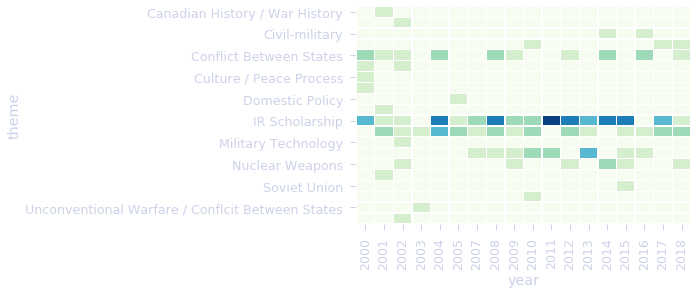

<Figure size 432x288 with 0 Axes>

In [22]:
# Create the crosstab DataFrame
pd_crosstab = pd.crosstab(df_hm["theme"], df_hm["year"])

# Plot a heatmap of the table with no color bar and using the BuGn palette
sns.heatmap(pd_crosstab, cbar=False, cmap="GnBu", linewidths=0.3)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.savefig('theme_heat_1.png', bbox_inches='tight', dpi=500)


#Show the plot
plt.show()
plt.clf()

In [23]:
pd_crosstab


year,2000,2001,2002,2003,2004,2005,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
theme,,,,,,,,,,,,,,,,,,
Canadian History / War History,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Civil War,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Civil-military,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
Cold War,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
Conflict Between States,2,1,1,0,2,0,0,2,1,0,0,1,0,2,0,2,0,1
Culture,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Culture / Peace Process,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Domestic Military History,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Domestic Policy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
df.groupby(['year'])['theme'].agg(sum)

year
2000    IR ScholarshipIR ScholarshipIR ScholarshipConf...
2001    Military HistoryMilitary HistoryEthics of WarC...
2002    Military HistoryMilitary TechnologyVietnam War...
2003    Military HistoryUnconventional Warfare / Confl...
2004    IR ScholarshipIR ScholarshipMilitary HistoryMi...
2005    IR ScholarshipDomestic PolicyMilitary HistoryM...
2007    OtherIR ScholarshipOtherIR ScholarshipMilitary...
2008    IR ScholarshipMilitary HistoryOtherConflict Be...
2009    Non-State ActorsNuclear WeaponsMilitary Histor...
2010    TerrorismIR ScholarshipMilitary HistoryIR Scho...
2011    Non-State ActorsIR ScholarshipNon-State Actors...
2012    Nuclear WeaponsIR ScholarshipMilitary HistoryI...
2013    Military HistoryNon-State ActorsOtherNon-State...
2014    Nuclear WeaponsConflict Between StatesConflict...
2015    Military HistoryIR ScholarshipNon-State Actors...
2016    Civil-militaryMilitary HistoryNon-State Actors...
2017    IR ScholarshipCold WarIR ScholarshipMilitary H...
2018    N

In [25]:
df['War'].groupby([df['year']]).sum()

year
2000    7
2001    5
2002    6
2003    2
2004    8
2005    2
2007    4
2008    6
2009    4
2010    4
2011    6
2012    6
2013    4
2014    3
2015    4
2016    2
2017    4
2018    2
Name: War, dtype: int64

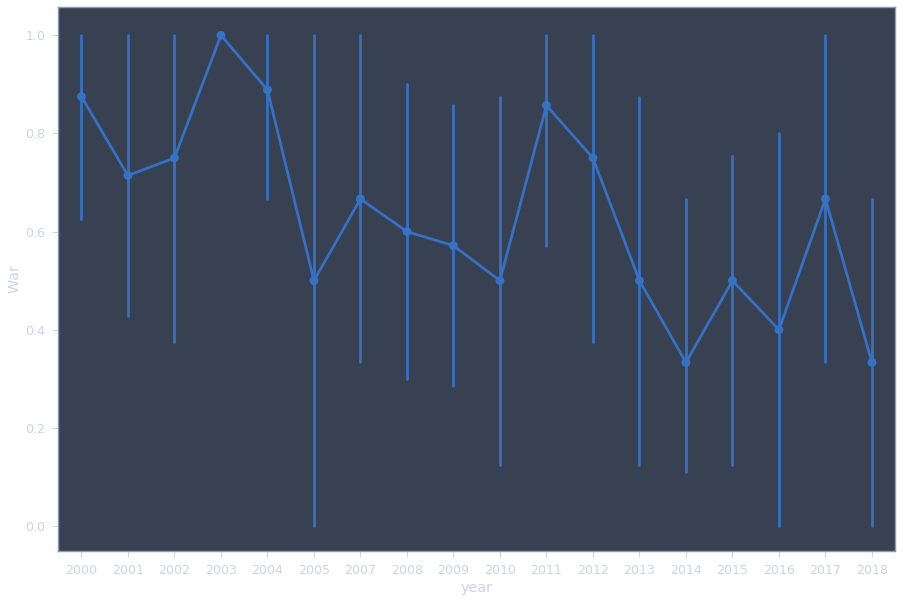

In [26]:
plt.figure(figsize=(15,10))
sns.pointplot(x='year', y='War', data=df)
plt.show()

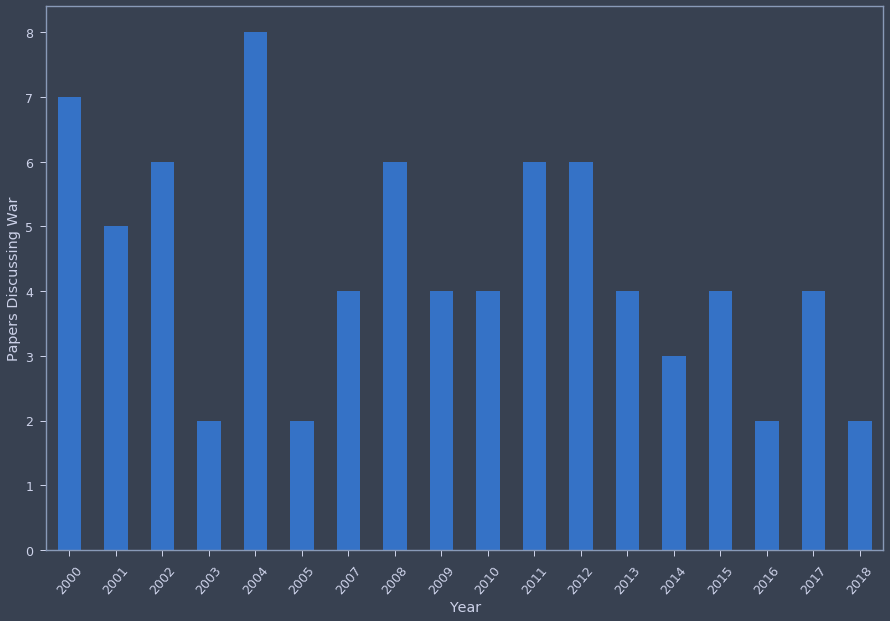

In [27]:
 #Counting up the different mentions of the various topics of interest

from jupyterthemes import jtplot
jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=False, figsize=(10, 9))

# Groupby by country
war = df['War'].groupby([df['year']]).sum()
# Summary statistic of all countries
war.describe().head()


plt.figure(figsize=(15,10))
war.plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Year")
plt.ylabel("Papers Discussing War")

plt.savefig('./img/mention_War.png')
plt.show()


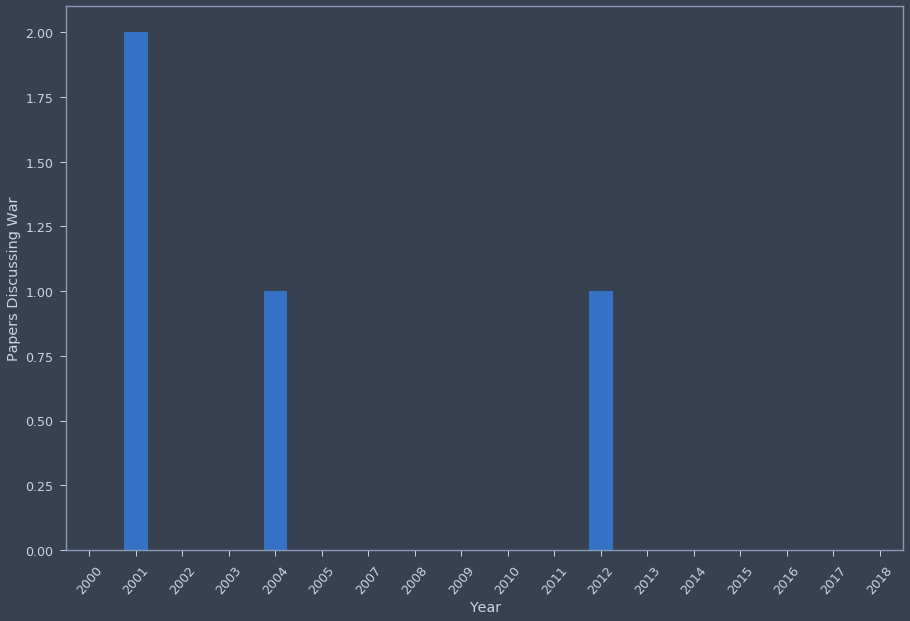

In [28]:
 #Counting up the different mentions of the various topics of interest

from jupyterthemes import jtplot
jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=False, figsize=(10, 9))

# Groupby by country
war = df['Korean War'].groupby([df['year']]).sum()
# Summary statistic of all countries
war.describe().head()


plt.figure(figsize=(15,10))
war.plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Year")
plt.ylabel("Papers Discussing War")
plt.show()


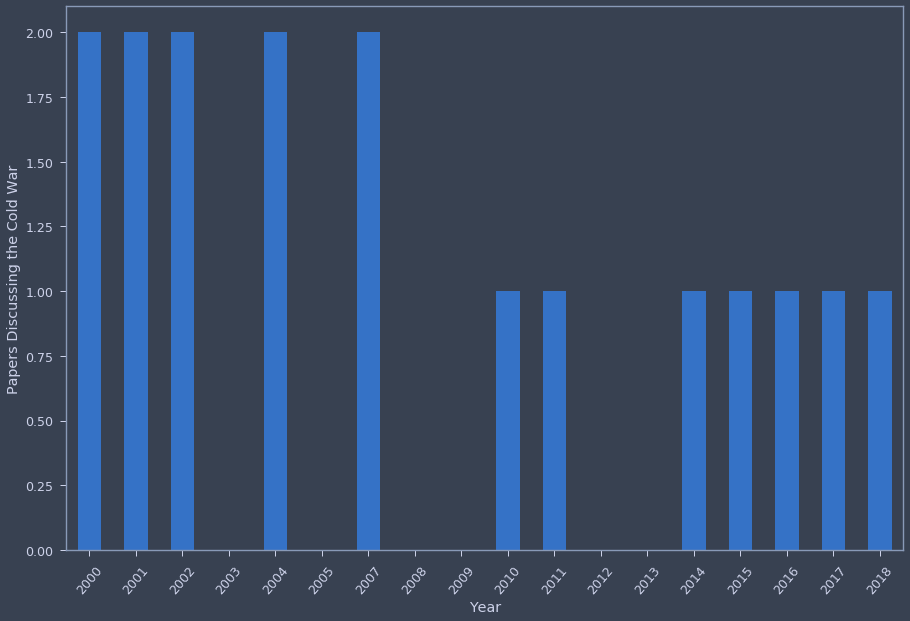

In [29]:
 #Counting up the different mentions of the various topics of interest

from jupyterthemes import jtplot
jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=False, figsize=(10, 9))

# Groupby by country
war = df['Cold War'].groupby([df['year']]).sum()
# Summary statistic of all countries
war.describe().head()


plt.figure(figsize=(15,10))
war.plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Year")
plt.ylabel("Papers Discussing the Cold War")

plt.savefig('./img/mention_ColdWar.png')
plt.show()



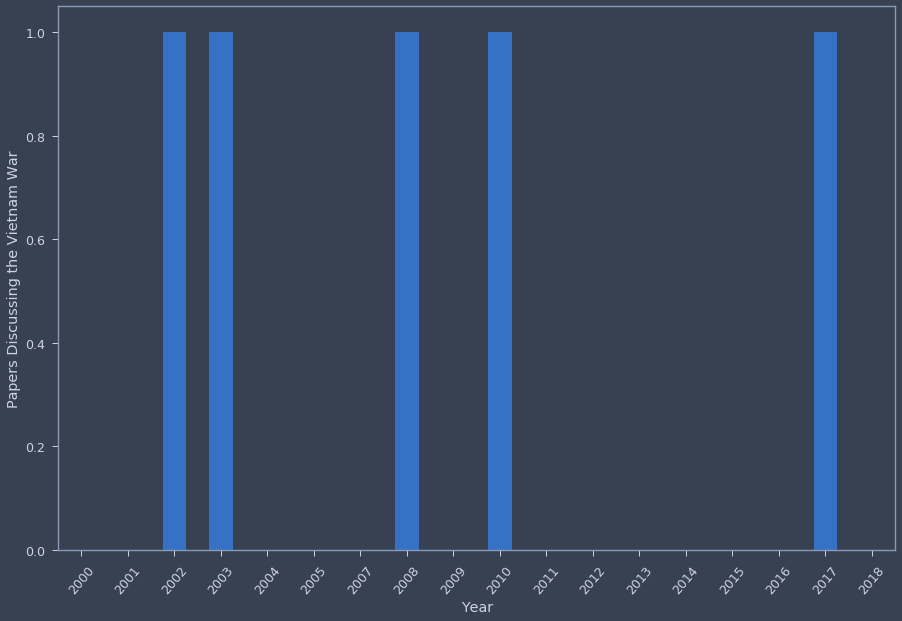

In [30]:
 #Counting up the different mentions of the various topics of interest

from jupyterthemes import jtplot
jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=False, figsize=(10, 9))

# Groupby by country
war = df['Vietnam War'].groupby([df['year']]).sum()
# Summary statistic of all countries
war.describe().head()


plt.figure(figsize=(15,10))
war.plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Year")
plt.ylabel("Papers Discussing the Vietnam War")
plt.show()


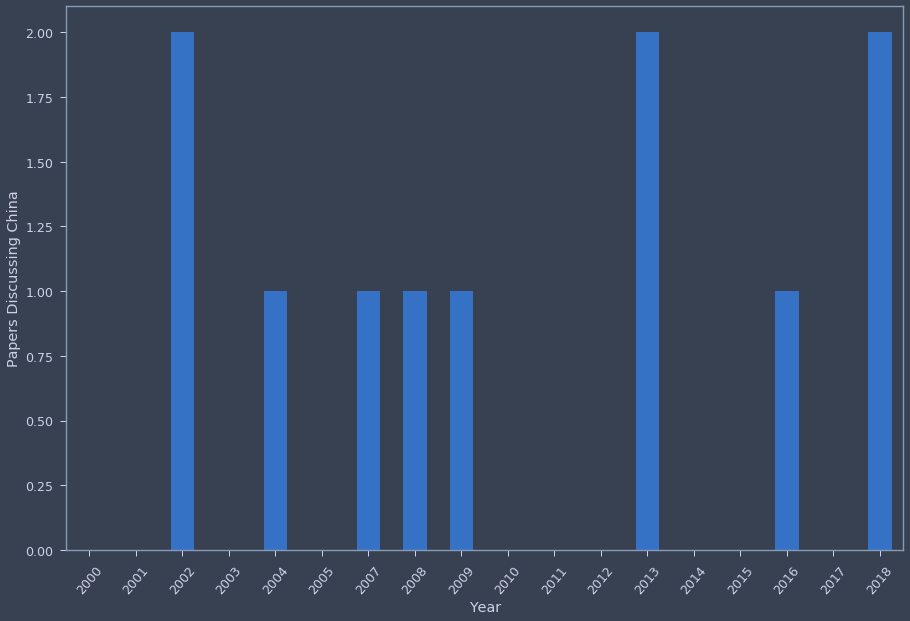

In [31]:
 #Counting up the different mentions of the various topics of interest

from jupyterthemes import jtplot
jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=False, figsize=(10, 9))

# Groupby by country
war = df['China'].groupby([df['year']]).sum()
# Summary statistic of all countries
war.describe().head()


plt.figure(figsize=(15,10))
war.plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Year")
plt.ylabel("Papers Discussing China")

plt.savefig('./img/mention_China.png')
plt.show()



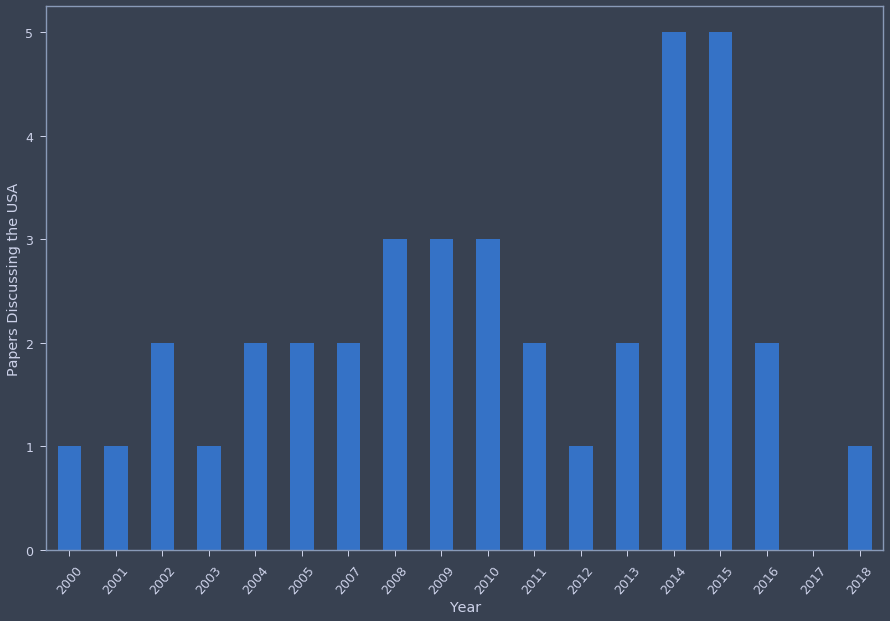

In [32]:
# Counting up the different mentions of the various topics of interest

from jupyterthemes import jtplot
jtplot.style(theme='oceans16', context='notebook',
             ticks=True, grid=False, figsize=(10, 9))

# Groupby by country
war = df['US'].groupby([df['year']]).sum()
# Summary statistic of all countries
war.describe().head()


plt.figure(figsize=(15, 10))
war.plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Year")
plt.ylabel("Papers Discussing the USA")

plt.savefig('./img/mention_USA.png')
plt.show()

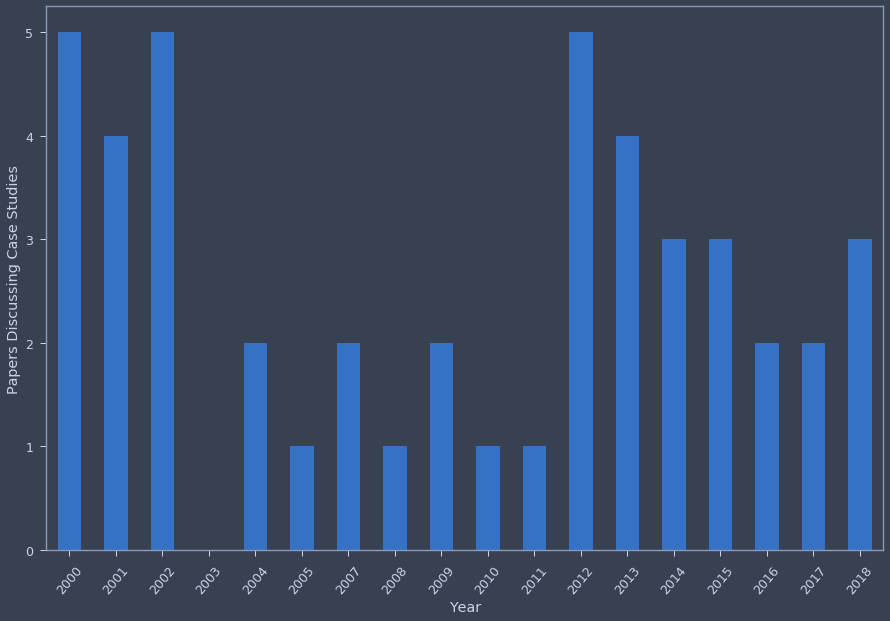

In [33]:
# Counting up the different mentions of the various topics of interest

from jupyterthemes import jtplot
jtplot.style(theme='oceans16', context='notebook',
             ticks=True, grid=False, figsize=(10, 9))

# Groupby by country
war = df['Case Study'].groupby([df['year']]).sum()
# Summary statistic of all countries
war.describe().head()


plt.figure(figsize=(15, 10))
war.plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Year")
plt.ylabel("Papers Discussing Case Studies")

plt.savefig('./img/mention_CaseStudy.png')
plt.show()


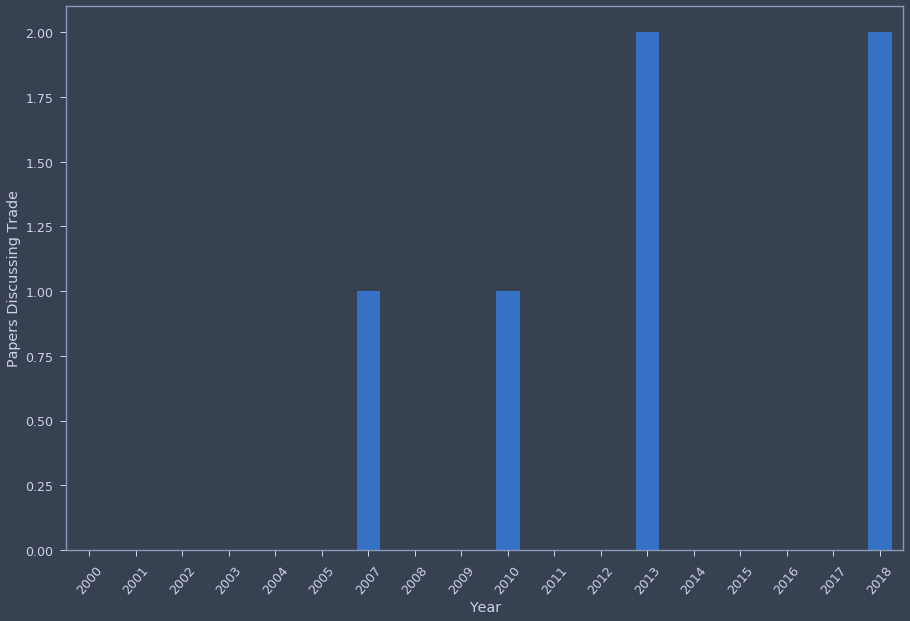

In [34]:
# Counting up the different mentions of the various topics of interest

from jupyterthemes import jtplot
jtplot.style(theme='oceans16', context='notebook',
             ticks=True, grid=False, figsize=(10, 9))

# Groupby by country
war = df['Trade'].groupby([df['year']]).sum()
# Summary statistic of all countries
war.describe().head()


plt.figure(figsize=(15, 10))
war.plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Year")
plt.ylabel("Papers Discussing Trade")

plt.savefig('./img/mention_Trade.png')
plt.show()


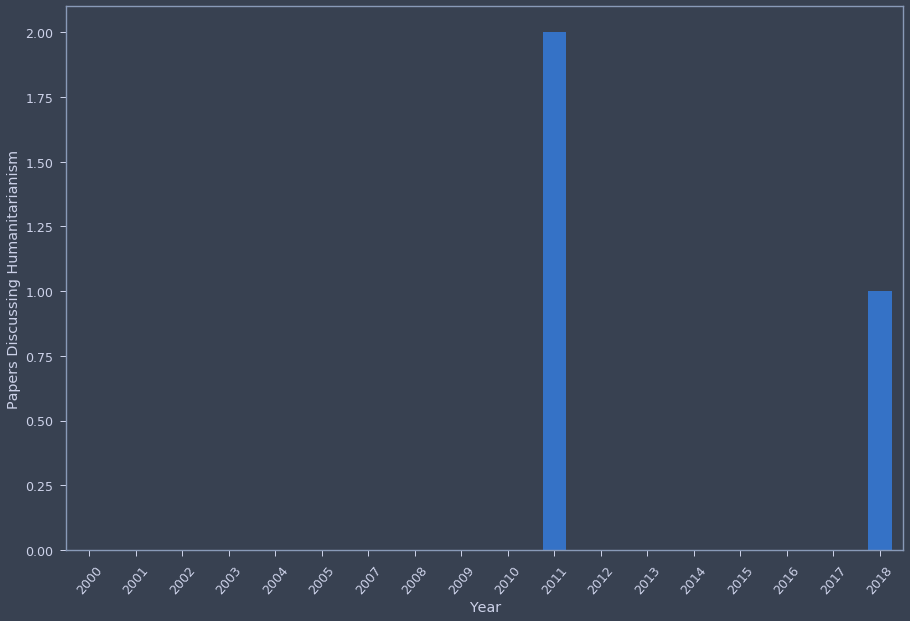

In [35]:
# Counting up the different mentions of the various topics of interest

from jupyterthemes import jtplot
jtplot.style(theme='oceans16', context='notebook',
             ticks=True, grid=False, figsize=(10, 9))

# Groupby by country
war = df['Humanitarian'].groupby([df['year']]).sum()
# Summary statistic of all countries
war.describe().head()


plt.figure(figsize=(15, 10))
war.plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Year")
plt.ylabel("Papers Discussing Humanitarianism")

plt.savefig('./img/mention_Humanitarian.png')
plt.show()


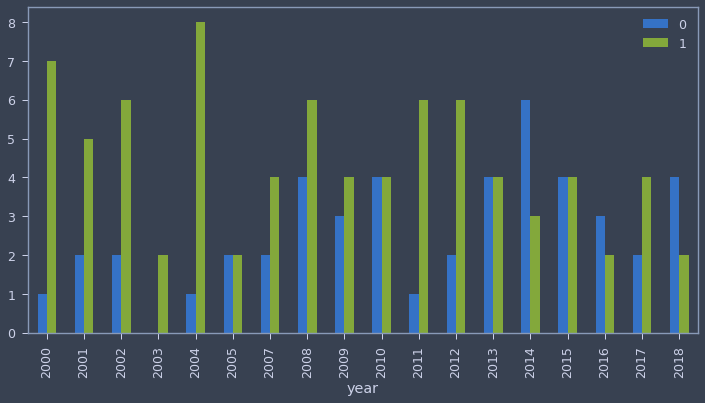

In [36]:
from jupyterthemes import jtplot
jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=False, figsize=(10, 9))

tmp = df.groupby('year')['War'].apply(lambda x: x.value_counts(normalize=False)).unstack()
fig, ax = plt.subplots(figsize=(12, 6))
tmp.plot(kind='bar', ax=ax)
plt.show()

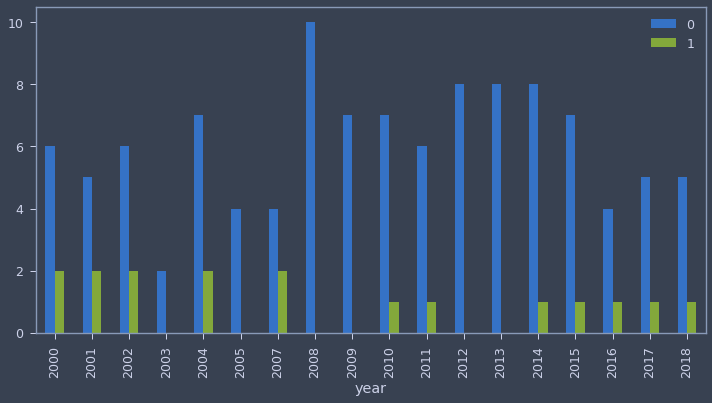

In [37]:
tmp = df.groupby('year')['Cold War'].apply(lambda x: x.value_counts(normalize=False)).unstack()
fig, ax = plt.subplots(figsize=(12, 6))
tmp.plot(kind='bar', ax=ax)
plt.show()

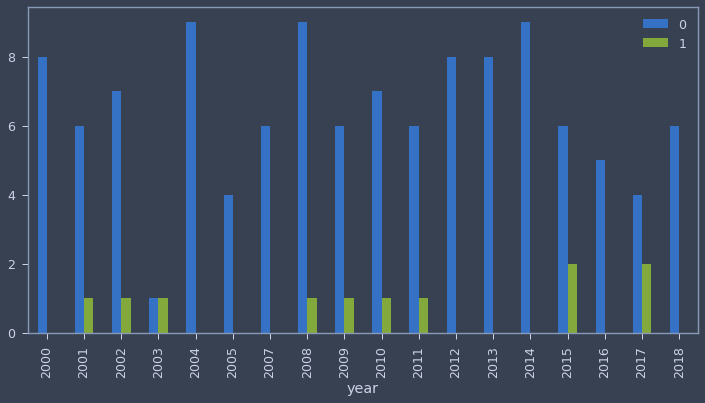

In [38]:
jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=False, figsize=(10, 9))
# context='talk', fscale=1.4, spines=False, gridlines='--')

tmp = df.groupby('year')['Vietnam'].apply(lambda x: x.value_counts(normalize=False)).unstack()
fig, ax = plt.subplots(figsize=(12, 6))
tmp.plot(kind='bar', ax=ax)
plt.show()

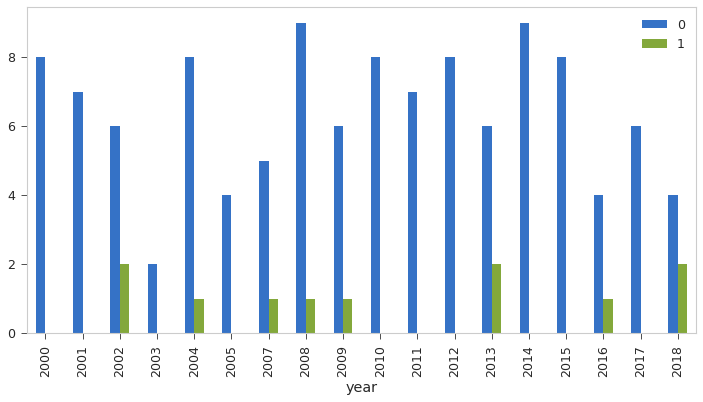

In [39]:
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

tmp = df.groupby('year')['China'].apply(lambda x: x.value_counts(normalize=False)).unstack()
fig, ax = plt.subplots(figsize=(12, 6))
tmp.plot(kind='bar', ax=ax)
plt.show()

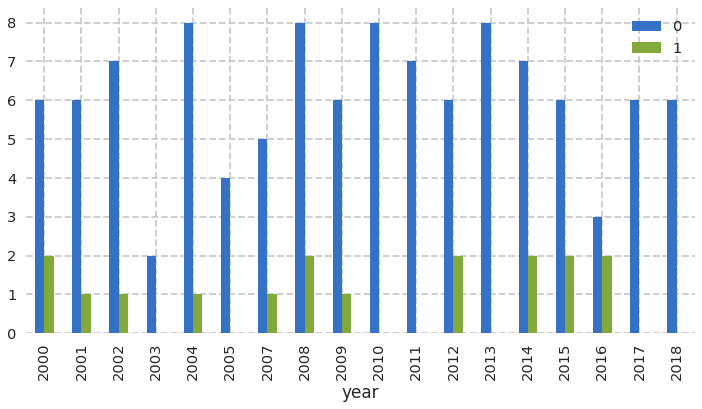

In [40]:
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

tmp = df.groupby('year')['Russia'].apply(lambda x: x.value_counts(normalize=False)).unstack()
fig, ax = plt.subplots(figsize=(12, 6))
tmp.plot(kind='bar', ax=ax)
plt.show()

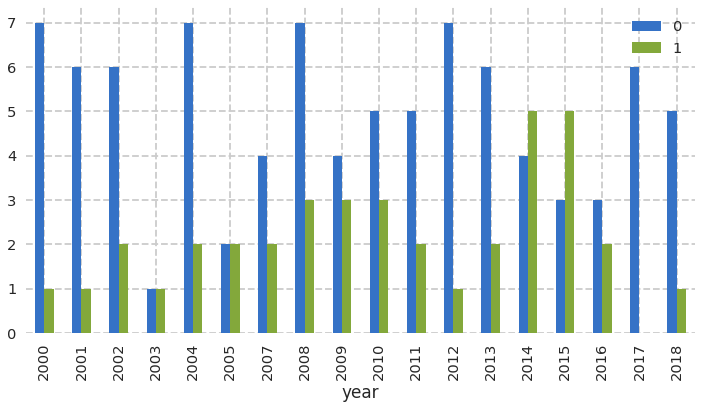

In [41]:
tmp = df.groupby('year')['US'].apply(lambda x: x.value_counts(normalize=False)).unstack()
fig, ax = plt.subplots(figsize=(12, 6))
tmp.plot(kind='bar', ax=ax)
plt.show()

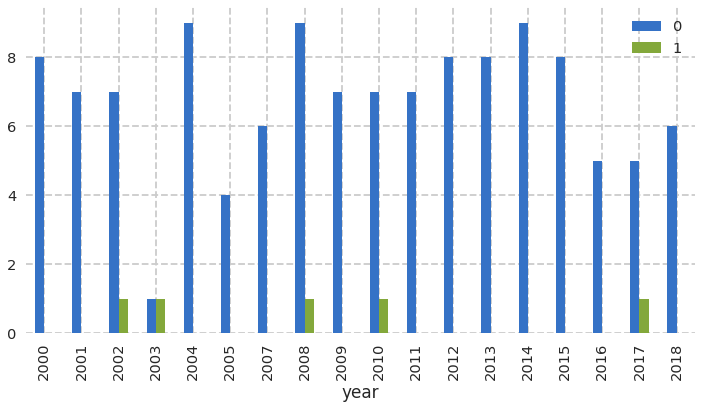

In [42]:
tmp = df.groupby('year')['Vietnam War'].apply(lambda x: x.value_counts(normalize=False)).unstack()
fig, ax = plt.subplots(figsize=(12, 6))
tmp.plot(kind='bar', ax=ax)
plt.show()

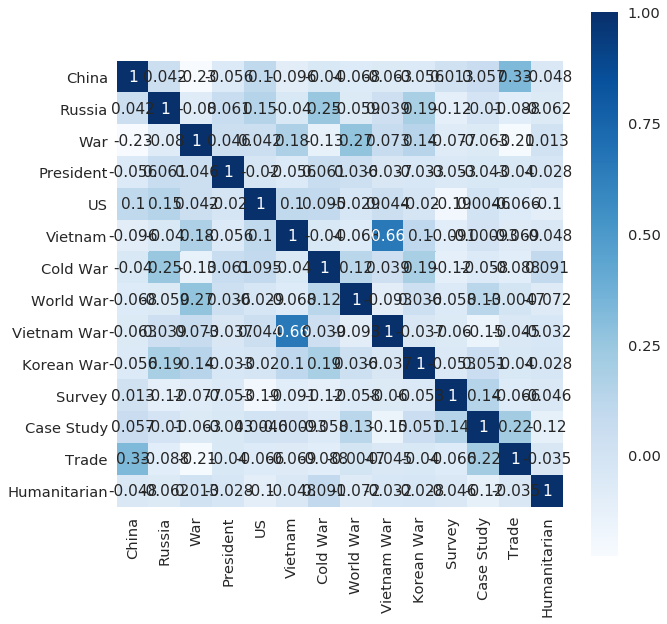

In [43]:
#there is a moderately positive relationship between seniority and salary
correlation = df.corr()  
plt.figure(figsize=(10, 10))  
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues')  

In [44]:
mention_features = df[['China', 'Russia', 'Cold War', 'World War', 'Korean War', 'Vietnam War']]

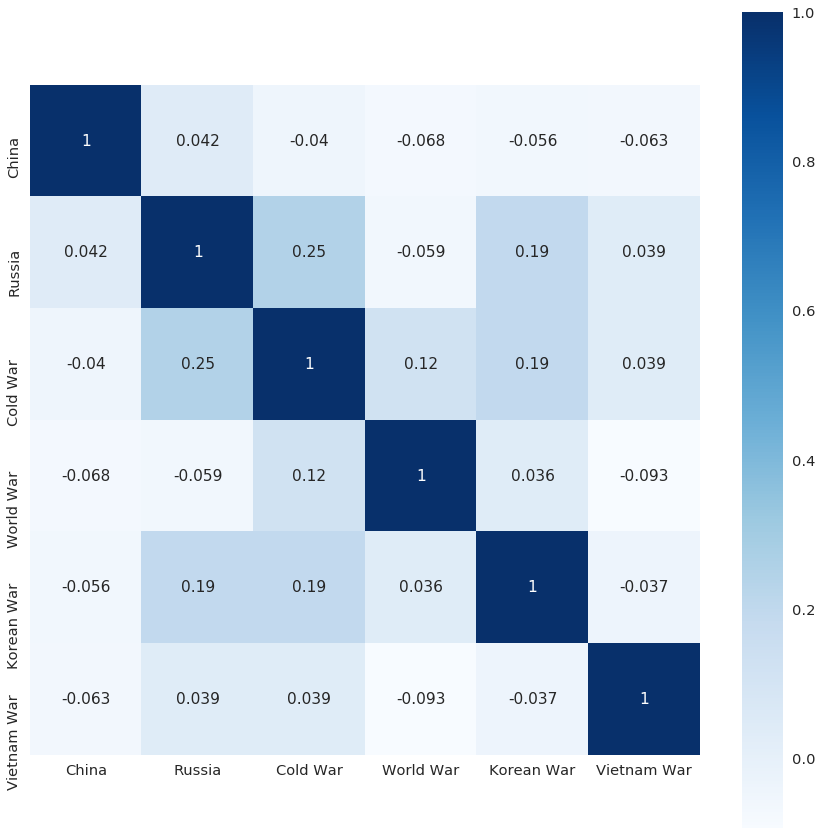

In [45]:
correlation = mention_features.corr()  
plt.figure(figsize=(15, 15))  
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='Blues') 
plt.savefig('./img/mention_features_corr.png')

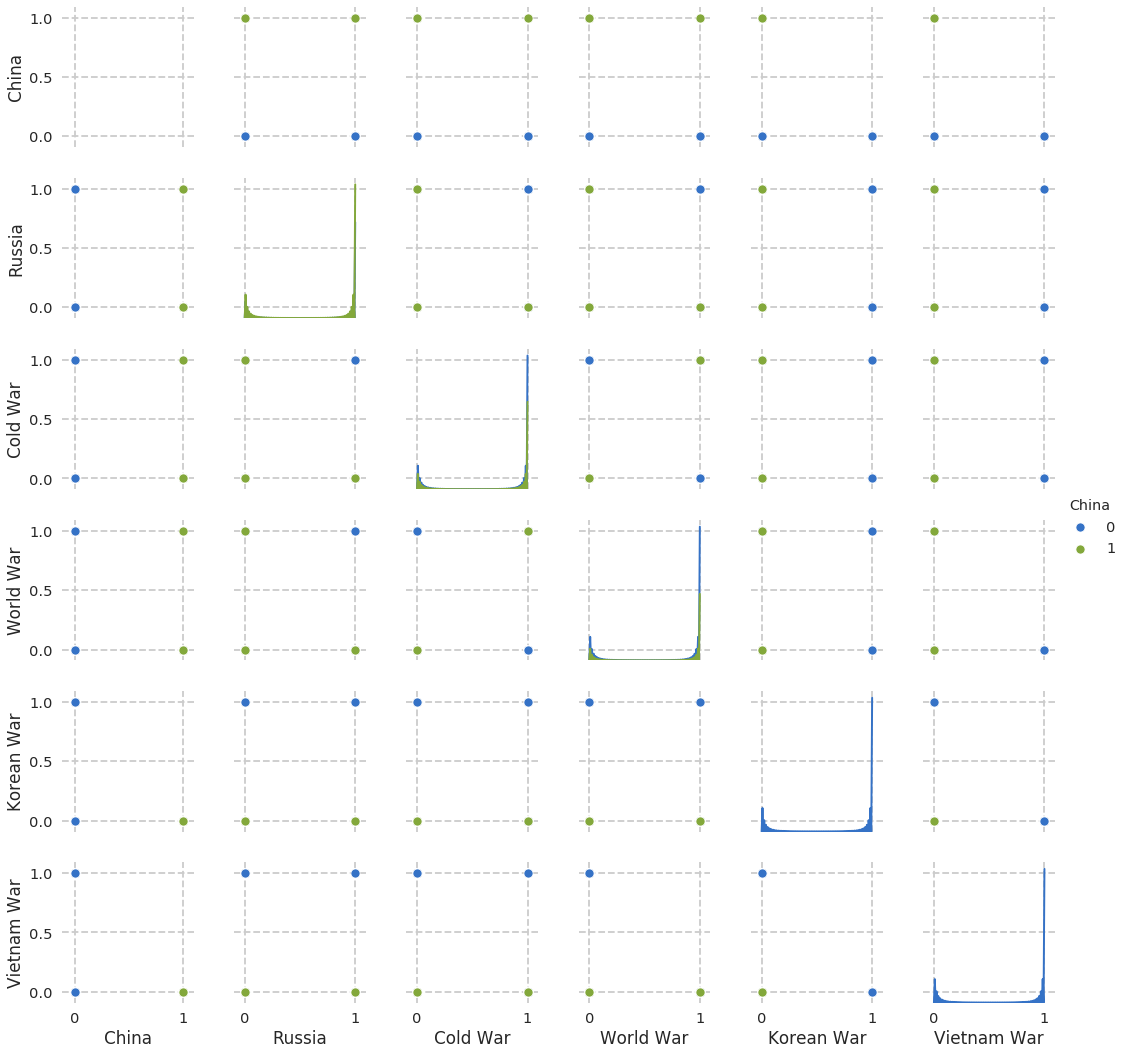

In [46]:
# Plot all features
g = sns.pairplot(mention_features, hue = 'China') 

In [47]:
#tmp = df.groupby('year')['US'].apply(lambda x: x.value_counts(normalize=False)).unstack()
#df['US'].groupby([df['year']]).sum()
#x=df['US'].groupby([df['year']]).sum()
#x
#sns.countplot(x=x)
df2 = df.groupby(['year'])["China", "Russia", "War", 'President', 'US', 'Vietnam',
                           'Cold War', 'World War', 'Vietnam War', 'Korean War', 'Survey', 'Case Study', 'Trade', 'Humanitarian'].agg(sum).unstack()
df2

              year
China         2000    0
              2001    0
              2002    2
              2003    0
              2004    1
              2005    0
              2007    1
              2008    1
              2009    1
              2010    0
              2011    0
              2012    0
              2013    2
              2014    0
              2015    0
              2016    1
              2017    0
              2018    2
Russia        2000    2
              2001    1
              2002    1
              2003    0
              2004    1
              2005    0
              2007    1
              2008    2
              2009    1
              2010    0
              2011    0
              2012    2
                     ..
Trade         2007    1
              2008    0
              2009    0
              2010    1
              2011    0
              2012    0
              2013    2
              2014    0
              2015    0
              2016   

In [48]:
df2 = df.groupby(['year'])["China", "Russia", "War", 'President', 'US', 'Vietnam',
                           'Cold War', 'World War', 'Vietnam War', 'Korean War', 'Survey', 'Case Study', 'Trade', 'Humanitarian'].agg(sum)
df2

,China,Russia,War,President,US,Vietnam,Cold War,World War,Vietnam War,Korean War,Survey,Case Study,Trade,Humanitarian
year,,,,,,,,,,,,,,
2000,0,2,7,2,1,0,2,5,0,0,1,5,0,0
2001,0,1,5,0,1,1,2,2,0,2,2,4,0,0
2002,2,1,6,0,2,1,2,1,1,0,0,5,0,0
2003,0,0,2,0,1,1,0,0,1,0,0,0,0,0
2004,1,1,8,0,2,0,2,1,0,1,0,2,0,0
2005,0,0,2,0,2,0,0,1,0,0,0,1,0,0
2007,1,1,4,0,2,0,2,2,0,0,0,2,1,0
2008,1,2,6,1,3,1,0,1,1,0,0,1,0,0
2009,1,1,4,0,3,1,0,0,0,0,0,2,0,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f287c56ac50>],
      dtype=object)

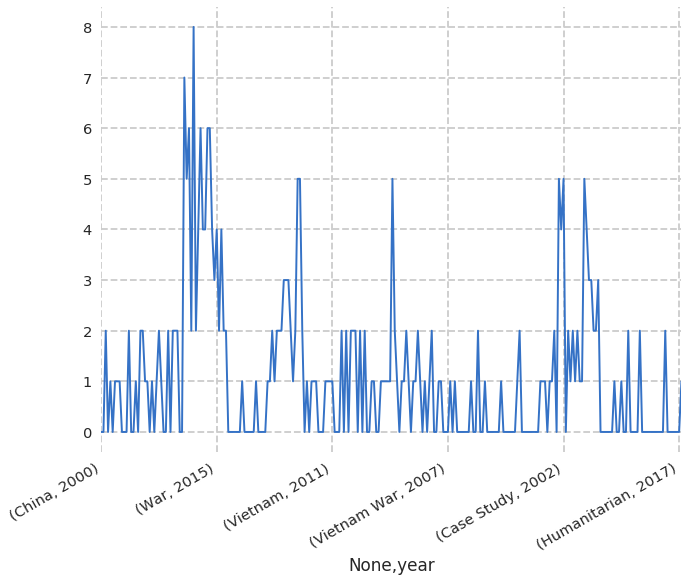

In [49]:
df2.unstack(level=0).plot(subplots=True)

<Figure size 1080x720 with 0 Axes>

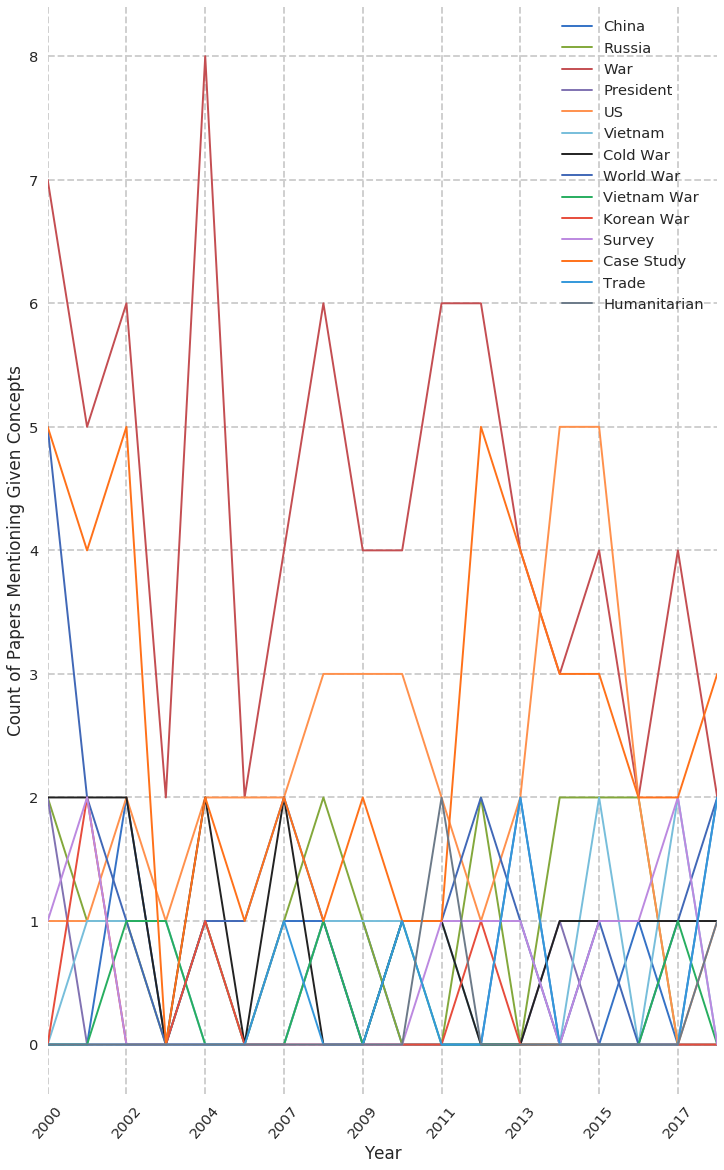

In [50]:
plt.figure(figsize=(15, 10))

df2.plot(figsize=(12, 20), subplots=False)

plt.xticks(rotation=50)
plt.xlabel("Year")
plt.ylabel("Count of Papers Mentioning Given Concepts")

plt.savefig('./img/plot2.png')
plt.show()

#plt.savefig('Mentions_2000_2018.png', bbox_inches='tight', dpi=500)

<Figure size 1080x720 with 0 Axes>

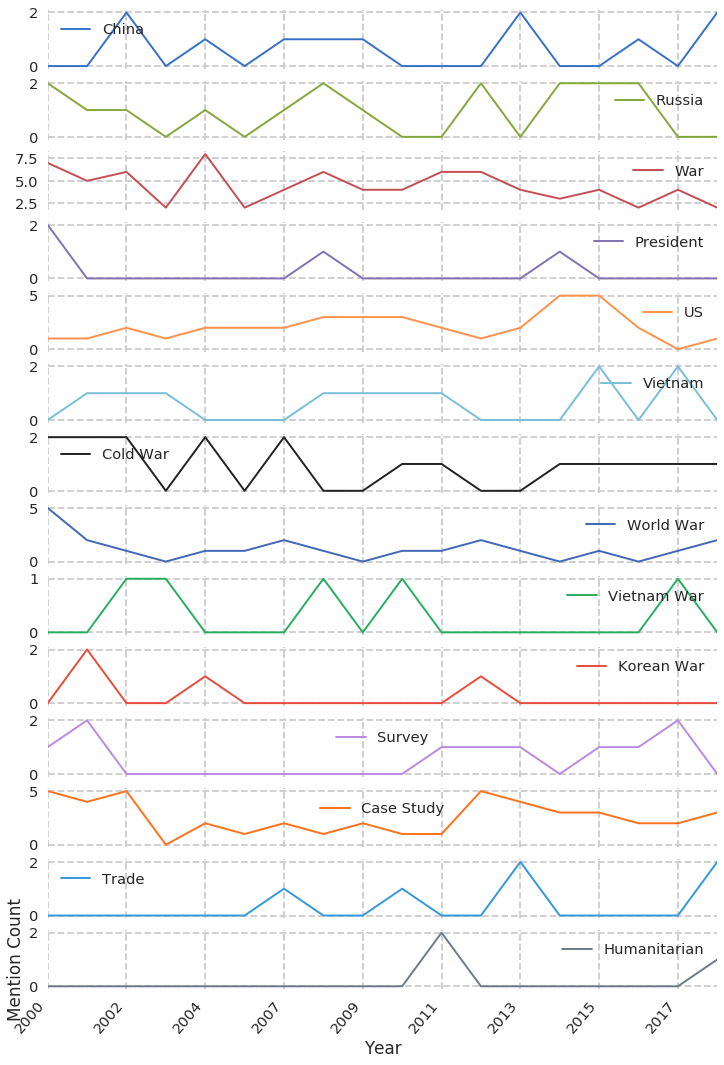

In [51]:
plt.figure(figsize=(15, 10))

df2.plot(figsize=(12, 20), subplots=True)

plt.xticks(rotation=50)
plt.xlabel("Year")
plt.ylabel("Mention Count")

plt.savefig('./img/subplot2.png')
plt.show()

#plt.savefig('Mentions_2000_2018.png', bbox_inches='tight', dpi=500)

# Chose different groups of features to plot

In [52]:
country_features = df2[['US','China','Russia', 'Vietnam']].dropna()

war_features = df2[['War', 'World War','Cold War','Korean War', 'Vietnam War']].dropna()

<Figure size 1080x720 with 0 Axes>

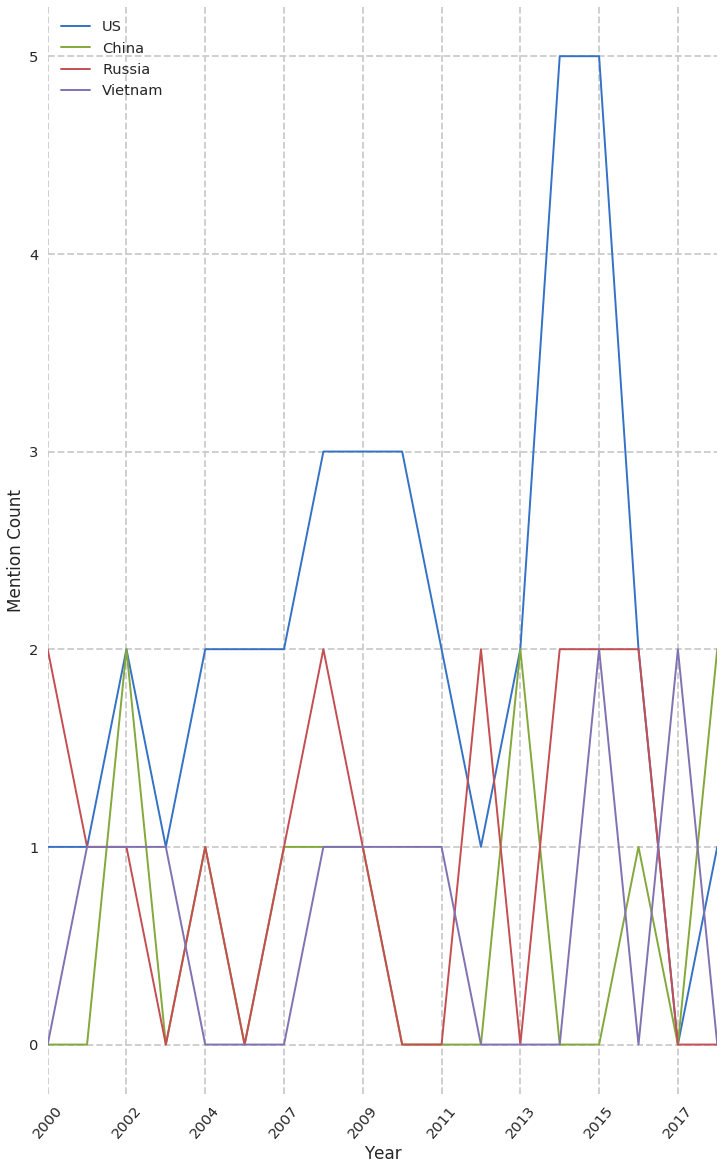

In [53]:
#Mentions Country

plt.figure(figsize=(15, 10))

country_features.plot(figsize=(12, 20), subplots=False)

plt.xticks(rotation=50)
plt.xlabel("Year")
plt.ylabel("Mention Count")

plt.savefig('./img/plot_country.png')
plt.show()

#plt.savefig('Mentions_2000_2018.png', bbox_inches='tight', dpi=500)

<Figure size 1080x720 with 0 Axes>

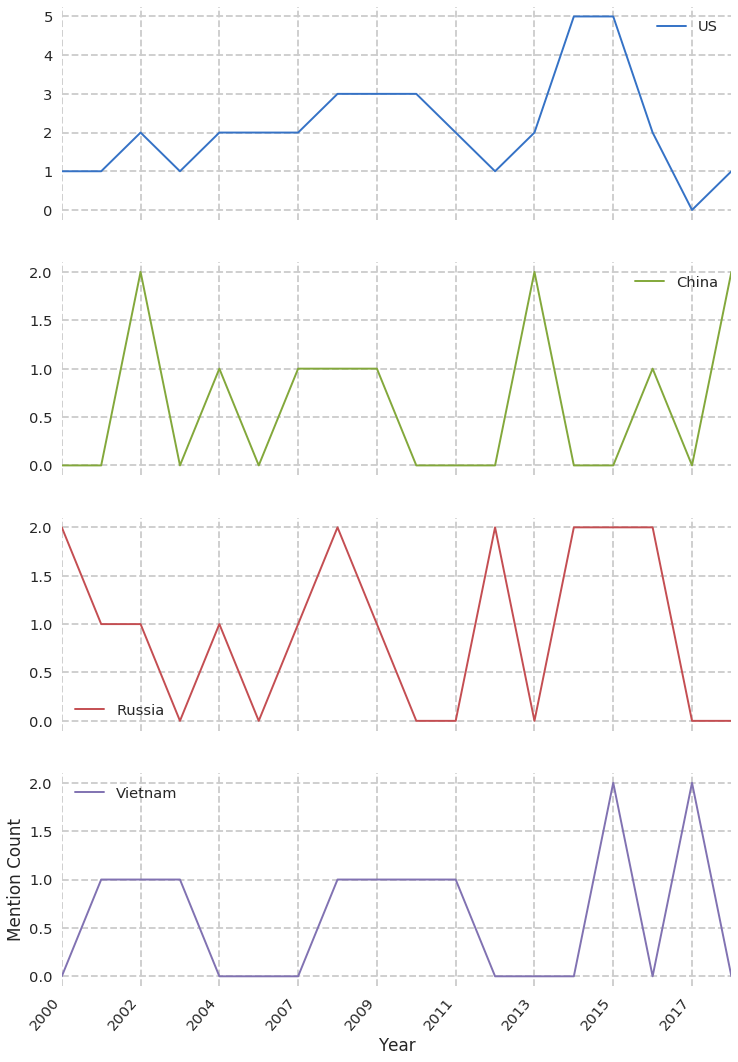

In [54]:
#Mentions Country

plt.figure(figsize=(15, 10))

country_features.plot(figsize=(12, 20), subplots=True)

plt.xticks(rotation=50)
plt.xlabel("Year")
plt.ylabel("Mention Count")

plt.savefig('./img/subplot_country.png')
plt.show()

#plt.savefig('Mentions_2000_2018.png', bbox_inches='tight', dpi=500)

<Figure size 1080x720 with 0 Axes>

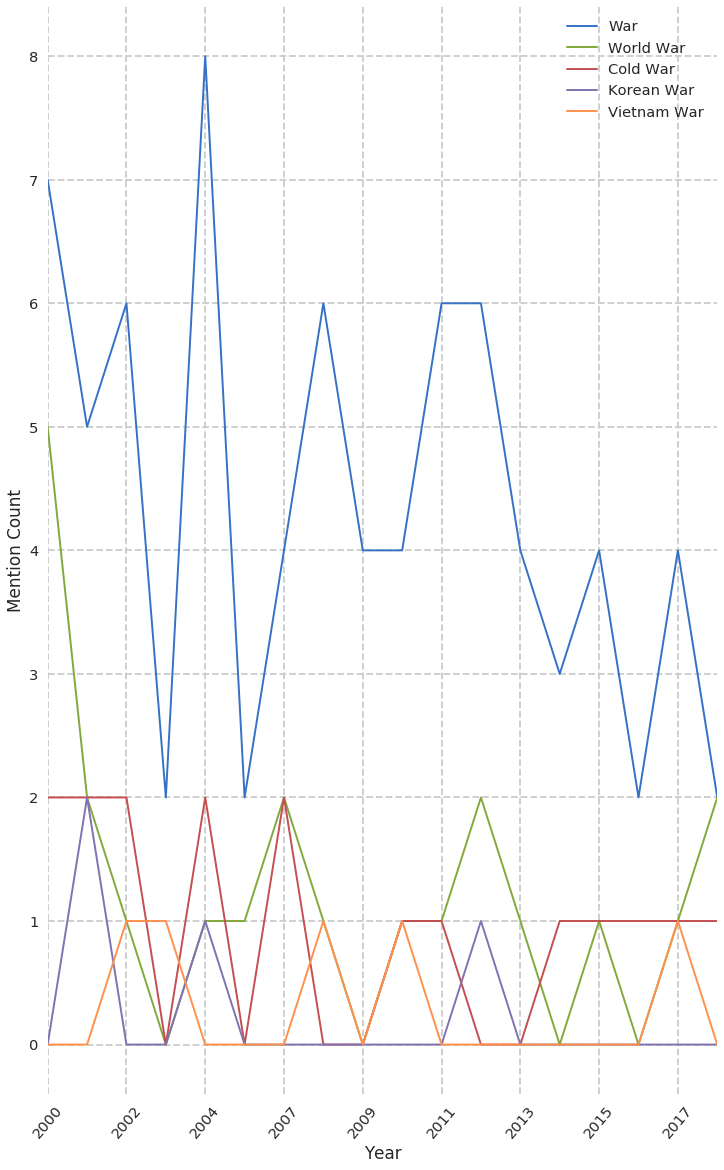

In [55]:
# War plotting

#Mentions war

plt.figure(figsize=(15, 10))

war_features.plot(figsize=(12, 20), subplots=False)

plt.xticks(rotation=50)
plt.xlabel("Year")
plt.ylabel("Mention Count")

plt.savefig('./img/plot_war.png')
plt.show()

#plt.savefig('Mentions_2000_2018.png', bbox_inches='tight', dpi=500)


<Figure size 1080x720 with 0 Axes>

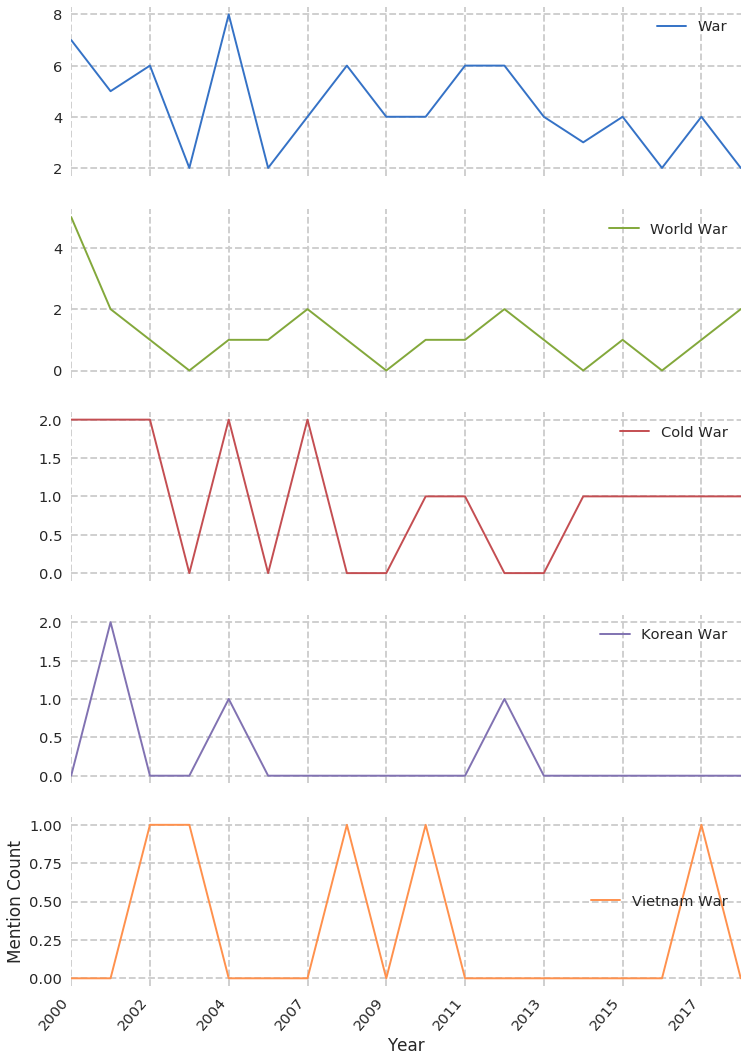

In [56]:
# War plotting

#Mentions war

plt.figure(figsize=(15, 10))

war_features.plot(figsize=(12, 20), subplots=True)

plt.xticks(rotation=50)
plt.xlabel("Year")
plt.ylabel("Mention Count")

plt.savefig('./img/subplot_war.png')
plt.show()

#plt.savefig('Mentions_2000_2018.png', bbox_inches='tight', dpi=500)


In [57]:
# Other examples

In [58]:
# df=df[["year", 'title', "abstract", 'theme', "China", "Russia", "War", 'President', 'US', 'Vietnam',
#       'Cold War', 'World War', 'Vietnam War', 'Korean War', 'Survey', 'Case Study', 'Trade', 'Humanitarian']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2879ccada0>,
      dtype=object)

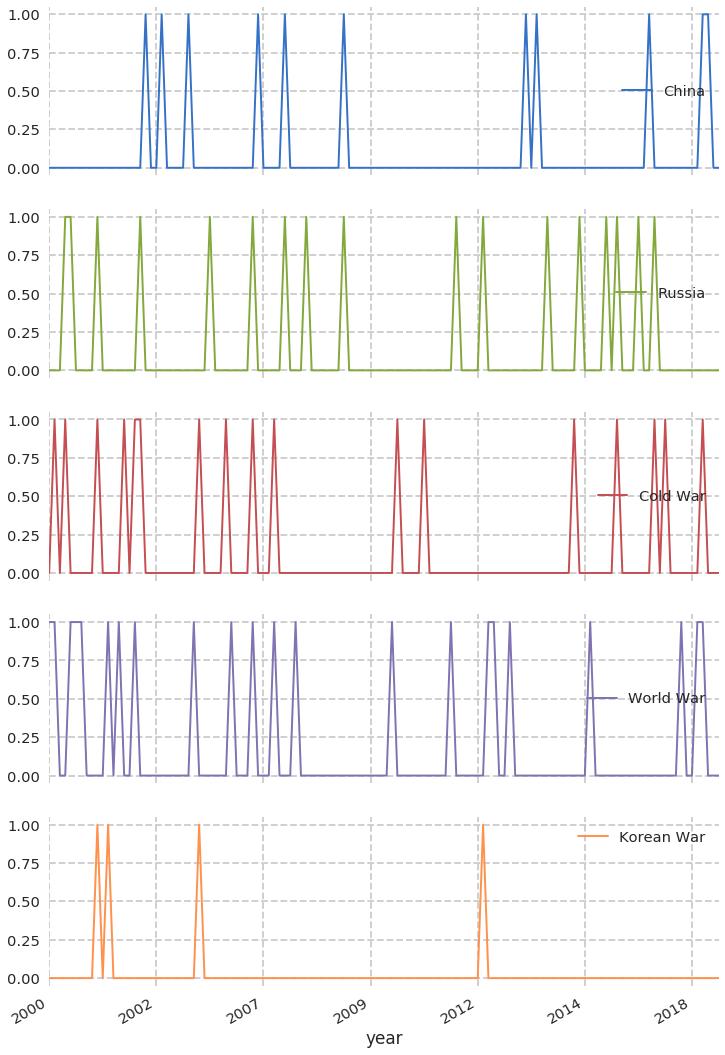

In [59]:
#df.plot(x='year', y = ['China', 'Russia', 'War', 'President', 'Vietnam'], figsize=(12,20), subplots=True)
df.plot(x='year', y = ['China', 'Russia', 'Cold War', 'World War', 'Korean War'], figsize=(12,20), subplots=True)



# Create the texts of Titles and Abstracts

In [87]:
features = df

title_text = " ".join(review for review in features.title)
print ("There are {} words in the combination of all titles.".format(len(title_text)))


abstract_text = " ".join(review for review in features.abstract)
print ("There are {} words in the combination of all abstracts.".format(len(abstract_text)))


There are 10317 words in the combination of all titles.
There are 272025 words in the combination of all abstracts.


# Word Clouds and topic modeling

# Here we will make some wordclouds and text mining

# Abstract Text Word Clouds

In [88]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
# % matplotlib inline

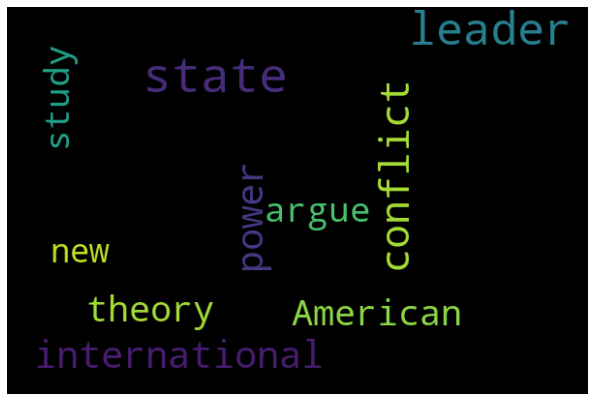

In [94]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["war", "state", "military", "dissertation", "political", 'will'])
#stopwords.update(["war", "military", "dissertation",
#                  "political", "wars", "will", "case", "State"])



# lower max_font_size, change the maximum number of word and lighten the background:
# background_color="white"
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=10,
                      margin=1, width=600, height=400).generate(abstract_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("img/wc_abstract_all.png")

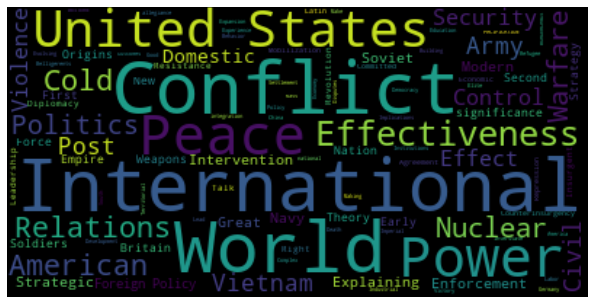

In [63]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["war", "state", "military", "dissertation", "political"])


# lower max_font_size, change the maximum number of word and lighten the background:
# background_color="white"
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50,
                      max_words=100).generate(title_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("img/wc_title_all.png")

# WCs For Different Years

## 2000

There are 742 words in the combination of all titles.
There are 31425 words in the combination of all abstracts.


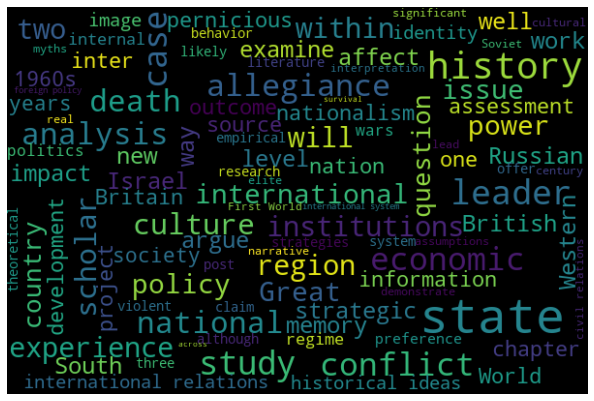

In [64]:
df_2000 = df[df.year == '2000']
features = df_2000

# 2000
title_text = " ".join(review for review in features.title)
print("There are {} words in the combination of all titles.".format(len(title_text)))


abstract_text = " ".join(review for review in features.abstract)
print("There are {} words in the combination of all abstracts.".format(
    len(abstract_text)))


# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["war", "state", "military", "dissertation", "political"])
# stopwords.update(["war", "military", "dissertation",
#                  "political", "wars", "will", "case", "State"])


# lower max_font_size, change the maximum number of word and lighten the background:
# background_color="white"
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100,
                      margin=1, width=600, height=400).generate(abstract_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("img/wc_abstract_2000.png")

### 2018

There are 557 words in the combination of all titles.
There are 11625 words in the combination of all abstracts.


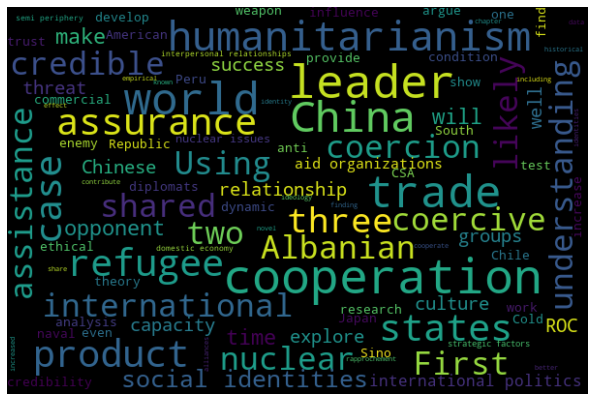

In [65]:
df_2018 = df[df.year == '2018']
features = df_2018

# 2000
title_text = " ".join(review for review in features.title)
print("There are {} words in the combination of all titles.".format(len(title_text)))


abstract_text = " ".join(review for review in features.abstract)
print("There are {} words in the combination of all abstracts.".format(
    len(abstract_text)))


# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["war", "state", "military", "dissertation", "political"])
# stopwords.update(["war", "military", "dissertation",
#                  "political", "wars", "will", "case", "State"])


# lower max_font_size, change the maximum number of word and lighten the background:
# background_color="white"
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100,
                      margin=1, width=600, height=400).generate(abstract_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Save the image in the img folder:
wordcloud.to_file("img/wc_abstract_2018.png")

# Word clouds deliverables

# nltk Tests

In [66]:
import nltk

english_stops=stopwords

english_stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'dissertation',
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'military',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',

In [67]:
# Import Counter
from collections import Counter
from nltk import word_tokenize

# Tokenize the article: tokens
tokens = word_tokenize(abstract_text)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

[('the', 126), (',', 92), ('of', 72), ('.', 64), ('and', 58), ('to', 50), ('in', 35), ('war', 22), ('i', 21), ('a', 20)]


In [68]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(abstract_text)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE International/NNP)
(NE Interpersonal/NNP Relationships/NNP)
(NE Nuclear/NNP Cooperation/NNP)
(NE Crimean/NNP War/NNP)
(NE China/NNP)
(NE Chinese/JJ)
(NE China/NNP)
(NE ROC/NNP)
(NE Chinese/NNP)
(NE Chiang/NNP)
(NE Third/NNP World/NNP)
(NE Chinese/JJ)
(NE Taiwan/NNP)
(NE China/NNP)
(NE Republican/JJ)
(NE China/NNP)
(NE ROC/NNP)
(NE China/NNP)
(NE United/NNP Nations/NNPS)
(NE Beijing/NNP People/NNP)
(NE Republic/NNP)
(NE U.N./NNP)
(NE Catholic/JJ)
(NE ROC/NNP)
(NE China/NNP)
(NE Nixon/NNP)
(NE Carter/NNP Administrations/NNP)
(NE Chiang/NNP)
(NE U.N./NNP)
(NE Confederate/NNP States/NNPS)
(NE America/NNP)
(NE CSA/NNP)
(NE Peru/NNP)
(NE Chile/NNP)
(NE Japan/NNP)
(NE China/NNP)
(NE U.S./NNP)
(NE CSA/NNP)
(NE U.S./NNP)
(NE Pacific/NNP)
(NE Chilean/NNP Civil/NNP War/NNP)
(NE China/NNP)
(NE Japan/NNP)
(NE Europe/NNP)
(NE CSA/NNP)
(NE Chile/NNP)
(NE Peru/NNP)
(NE China/NNP)
(NE Japan/NNP)
(NE Americas/NNPS)
(NE Pacific/NNP)
(NE North/NNP Atlantic/NNP)
(NE U.S./NNP)
(NE United/NNP States/NNPS

In [69]:
import spacy
from spacy import displacy
from collections import Counter

# Instantiate the English model: nlp
nlp = spacy.load('en', tagger=False, parser=False, matcher=False)

# Create a new document: doc
article=abstract_text
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG Trust
ORG International Politics: Identity
ORG Interpersonal Relationships
ORG Nuclear Cooperation
NORP Argentine
CARDINAL one
CARDINAL two
CARDINAL 1
CARDINAL 2
CARDINAL four
EVENT Crimean War
DATE 1854-6
EVENT World War I
EVENT World War II
GPE India
GPE Pakistan
DATE 1945
DATE 2000
ORG the Anti-Imperial Mantle
GPE The Republic of China’s Encounter
DATE 1942-71
NORP Chinese
GPE the Republic of China
GPE ROC
EVENT Cold War
NORP Chinese
PERSON Chiang Kai-shek
EVENT the Cold War
DATE the present day
NORP Chinese
NORP Nationalists
GPE Taiwan
DATE 1949-50
GPE China
NORP Republican
GPE China
GPE ROC
EVENT World War II
GPE China
ORG the United Nations
DATE the years
FAC the Beijing People’s Republic
ORG U.N.
NORP Pan-Asianist
EVENT the Cold War
GPE ROC
NORP Catholic
GPE ROC
DATE the 1960s and 1970s
CARDINAL One
GPE China
NORP Sino-American
DATE 1971-79
PERSON Nixon
PERSON Carter Administrations
PERSON Chiang
CARDINAL one
CARDINAL two
NORP Chinese
DATE over two decades
ORG Cross-Straits


In [70]:
wc_features = df

wc_features.head()

,year,title,abstract,theme,China,Russia,War,President,US,Vietnam,Cold War,World War,Vietnam War,Korean War,Survey,Case Study,Trade,Humanitarian
0,2000,"""Institutions at the Domestic/International Ne...",Civil-military relations are frequently studie...,IR Scholarship,0,0,1,1,0,0,0,1,0,0,0,1,0,0
1,2000,Born to Lose and Doomed to Survive: State Deat...,"Under what conditions do states die, or exit t...",IR Scholarship,0,0,1,0,0,0,1,1,0,0,0,0,0,0
2,2000,The significance of “allegiance” in internatio...,My dissertation employs original and secondary...,IR Scholarship,0,0,1,0,0,0,0,0,0,0,1,1,0,0
3,2000,The significance of “allegiance” in internatio...,\nThis study revises prevailing interpretation...,Conflict Between States,0,1,0,1,0,0,1,0,0,0,0,0,0,0
4,2000,Truth-Telling and Mythmaking in Post-Soviet Ru...,Can distorted and pernicious ideas about histo...,Conflict Between States,0,1,1,0,0,0,0,1,0,0,0,1,0,0


# Summary Stats:


In [71]:
df['abstract'].apply(len).mean()

2157.936507936508

In [72]:
df['title'].apply(len).mean()

80.88888888888889

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['abstract'])


In [74]:
text_counts

<126x5450 sparse matrix of type '<class 'numpy.int64'>'
	with 16279 stored elements in Compressed Sparse Row format>

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['abstract'])


In [76]:
text_tf

<126x5663 sparse matrix of type '<class 'numpy.float64'>'
	with 21458 stored elements in Compressed Sparse Row format>

# Abstract Word Counts

In [77]:
import re
# Print the titles of the first rows 
print(df['abstract'].head())

# Remove punctuation
df['abstract_processed'] = df['abstract'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['abstract_processed'] = df['abstract_processed'].map(lambda x: x.lower())

print(df['abstract_processed'].head())


0    Civil-military relations are frequently studie...
1    Under what conditions do states die, or exit t...
2    My dissertation employs original and secondary...
3    \nThis study revises prevailing interpretation...
4    Can distorted and pernicious ideas about histo...
Name: abstract, dtype: object
0    civil-military relations are frequently studie...
1    under what conditions do states die or exit th...
2    my dissertation employs original and secondary...
3    \nthis study revises prevailing interpretation...
4    can distorted and pernicious ideas about histo...
Name: abstract_processed, dtype: object


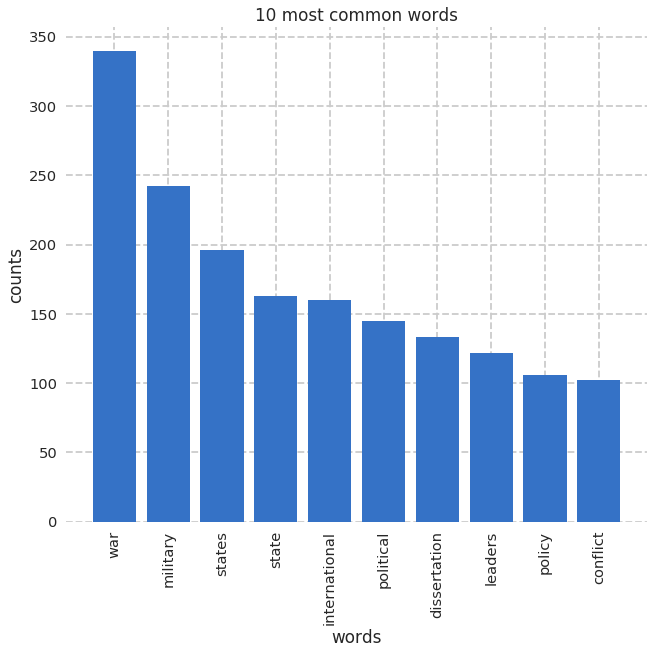

In [78]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['abstract_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)


# Title Word Counts

In [79]:
import re
# Print the titles of the first rows 
print(df['title'].head())

# Remove punctuation
df['title_processed'] = df['title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['title_processed'] = df['title_processed'].map(lambda x: x.lower())

print(df['title_processed'].head())


0    "Institutions at the Domestic/International Ne...
1    Born to Lose and Doomed to Survive: State Deat...
2    The significance of “allegiance” in internatio...
3    The significance of “allegiance” in internatio...
4    Truth-Telling and Mythmaking in Post-Soviet Ru...
Name: title, dtype: object
0    "institutions at the domestic/international ne...
1    born to lose and doomed to survive: state deat...
2    the significance of “allegiance” in internatio...
3    the significance of “allegiance” in internatio...
4    truth-telling and mythmaking in post-soviet ru...
Name: title_processed, dtype: object


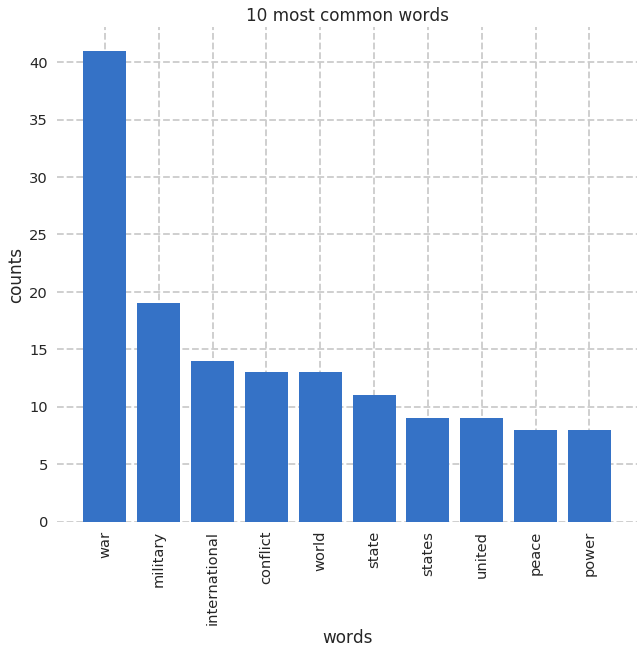

In [80]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)


### 2000 Word Counts

0    Civil-military relations are frequently studie...
1    Under what conditions do states die, or exit t...
2    My dissertation employs original and secondary...
3    \nThis study revises prevailing interpretation...
4    Can distorted and pernicious ideas about histo...
Name: abstract, dtype: object
0    civil-military relations are frequently studie...
1    under what conditions do states die or exit th...
2    my dissertation employs original and secondary...
3    \nthis study revises prevailing interpretation...
4    can distorted and pernicious ideas about histo...
Name: abstract_processed, dtype: object


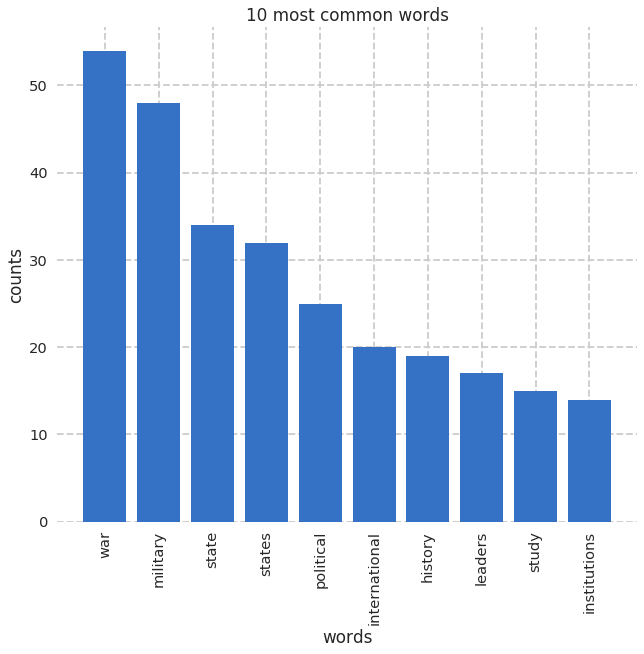

In [81]:
import re
# Print the titles of the first rows 
print(df_2000['abstract'].head())

# Remove punctuation
df_2000['abstract_processed'] = df_2000['abstract'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df_2000['abstract_processed'] = df_2000['abstract_processed'].map(lambda x: x.lower())

print(df_2000['abstract_processed'].head())


# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_2000['abstract_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)


### 2018 Word Counts

131    In my dissertation, I focus on how leader rela...
132    In times of war, why do belligerents continue ...
133    My dissertation project, Clinging to the Anti-...
134    Using a transnational methodology and sources ...
135    There is a dilemma at the heart of coercion. S...
Name: abstract, dtype: object
131    in my dissertation i focus on how leader relat...
132    in times of war why do belligerents continue t...
133    my dissertation project clinging to the anti-i...
134    using a transnational methodology and sources ...
135    there is a dilemma at the heart of coercion su...
Name: abstract_processed, dtype: object


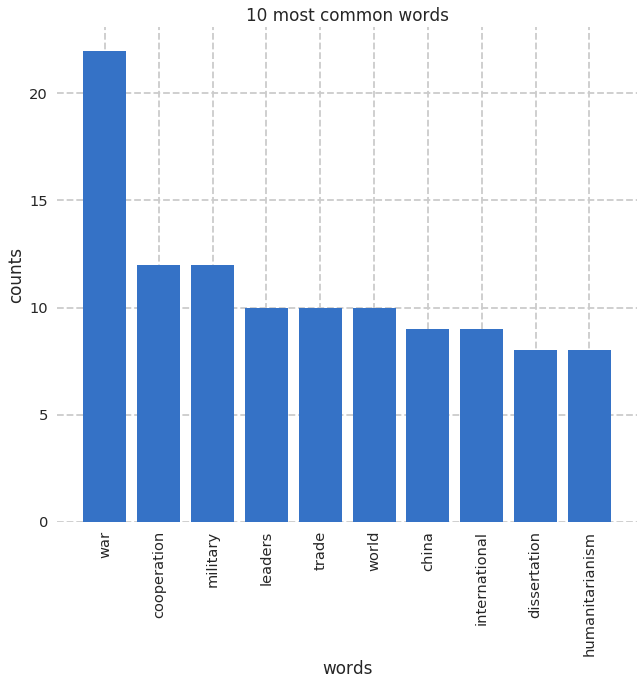

In [82]:
import re
# Print the titles of the first rows 
print(df_2018['abstract'].head())

# Remove punctuation
df_2018['abstract_processed'] = df_2018['abstract'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df_2018['abstract_processed'] = df_2018['abstract_processed'].map(lambda x: x.lower())

print(df_2018['abstract_processed'].head())


# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_2018['abstract_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)


# LDA Model

In [83]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sklearn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 8

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)


Topics found via LDA:

Topic #0:
using states north weapons dissertation non dilemma national

Topic #1:
war trade state military products time economy commercial

Topic #2:
using states north weapons dissertation non dilemma national

Topic #3:
war china world roc chinese periphery semi states

Topic #4:
cooperation leaders international humanitarianism nuclear identities social relationships
